# Lab 1 - Python fundamentals

In [34]:
import matplotlib.pyplot as plt
import re

data_path = "data"
path_dna = f"{data_path}/dna_raw.txt"
path_dna_complicated = f"{data_path}/dna_raw_complicated.txt"

def extract_clean_data(path):
    with open(path, "r") as file:
        text = file.read()

        text = re.sub(r"\d", "", text)#Removes the digits as the seq are in order we dont need them
        text = re.sub("\n", "", text)#Removes new row because we dont need them
        text = text.lower() #set the text to be lowercase to make it easier to work with
        texts = text.split(">seq") #split each sequence so each one is an item of a list
        return texts
    
def sort_DNA_to_dicts(texts):
    dna_list = []
    for text in texts:
        #this is to exclude the first item of the list which is empty TDLR: did use chatgpt to find this problem and handle it
        if not text.strip():
            continue
        sequence = dict(a = 0, t =0, c = 0, g = 0)
        for letter in text: #TODO: Try to make this part cleaner
            if letter == "a":
                sequence["a"] += 1
            if letter == "t":
                sequence["t"] += 1
            if letter == "c":
                sequence["c"] += 1
            if letter == "g":
                sequence["g"] += 1
        dna_list.append(sequence)
    return dna_list

def plot_bar_chart(sequences):
    fig, ax = plt.subplots(len(sequences), figsize=(12,40)) #TODO: add ticker to remove decimals
    i = 0
    for sequence in sequences:
        ax[i].bar(*zip(*sequence.items())) 
        ax[i].set(title=(f"DNA Sequence {i+1}"),xlabel=("DNA Letters"), ylabel=("Frequency"))
        i += 1

#### Run this block to test the dna_raw document

In [36]:
dna_texts = extract_clean_data(path_dna)

#### Run this block to test the dna_raw_complicated document

In [38]:
dna_texts = extract_clean_data(path_dna_complicated)
print(dna_texts)

['', 'cgtaaccaataaaaaaacaagcttaacctaattc', 'agcttagtttggatctggccgggg', 'gcggatttactccccccaaaaannaggggagagcccagataaatggagtctgtgcgtccacagaattcgcaccaaataaaacctcacccatagagcccagaatttactcccc', 'gcggatttactcaggggagagcccagggataaatggagtctgtgcgtccacagaattcgcacca']


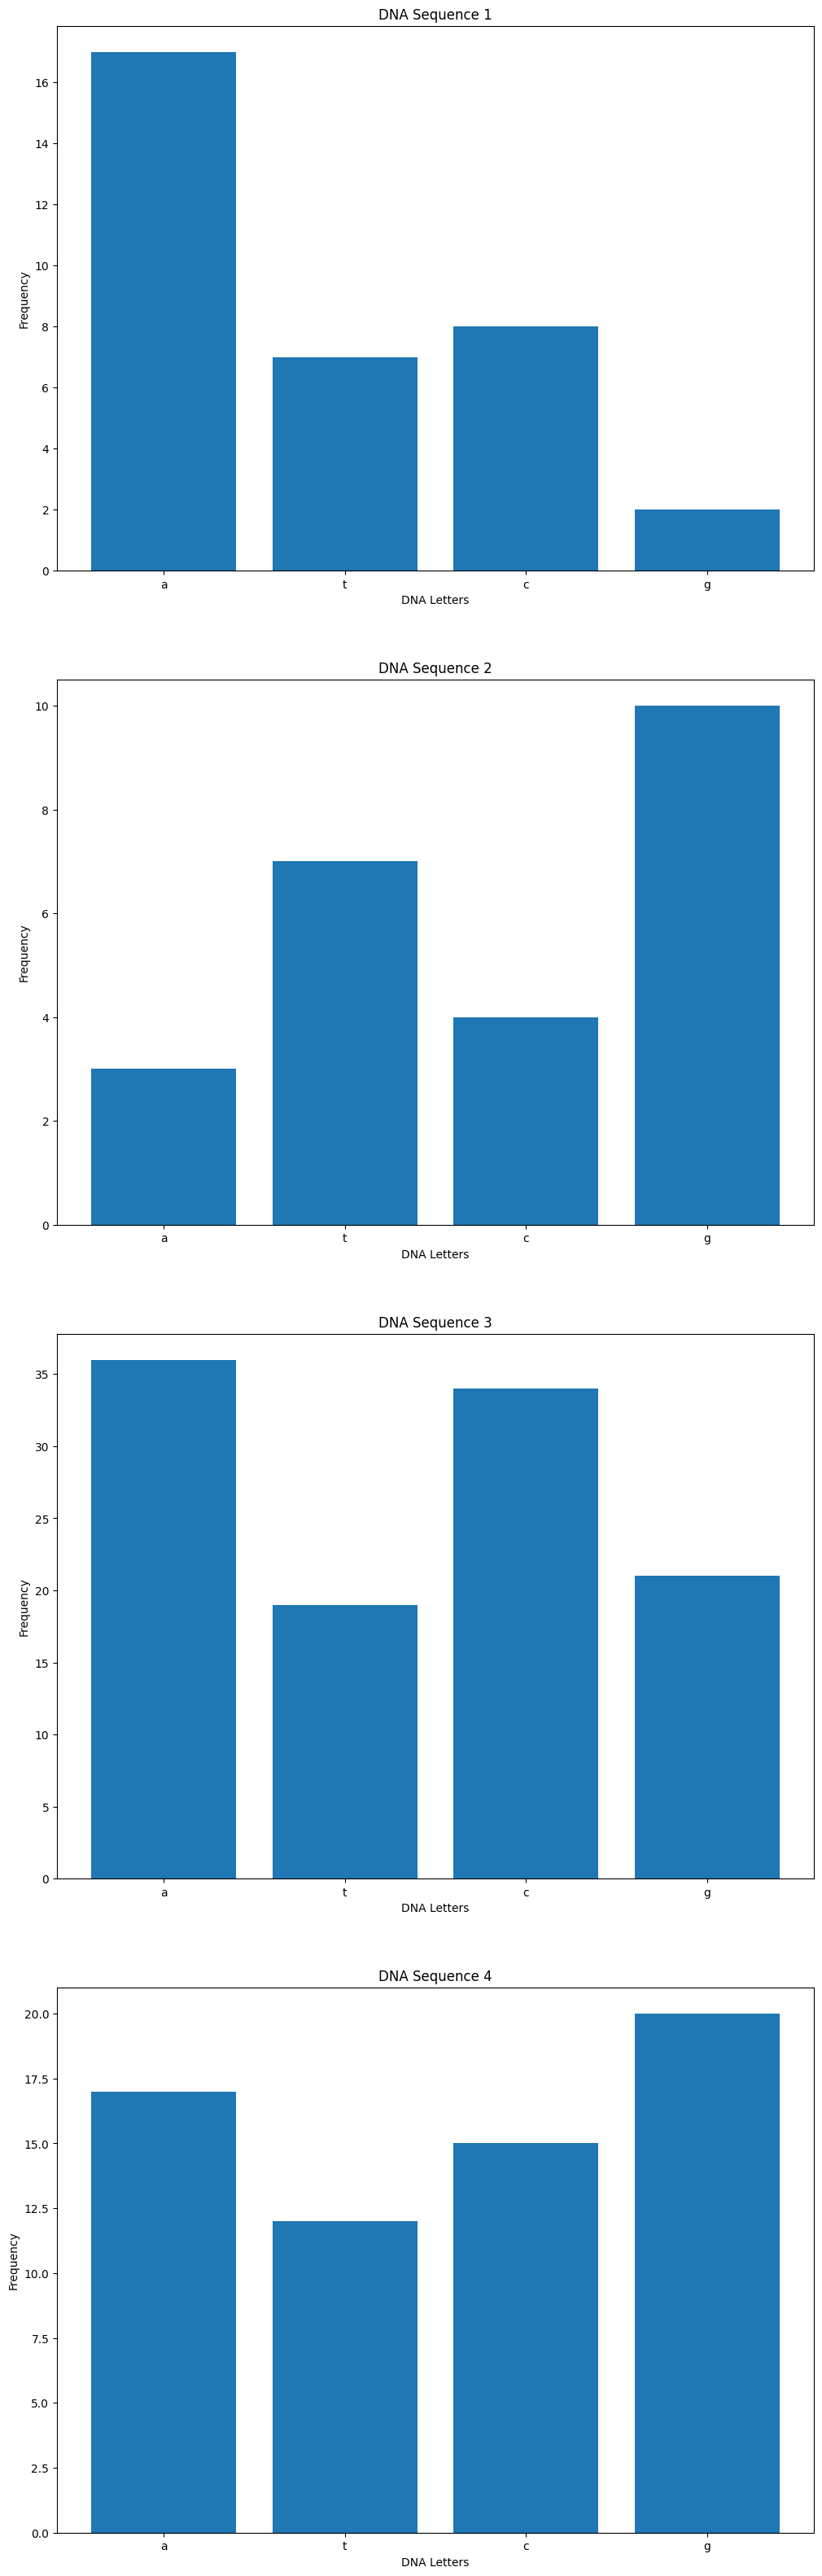

In [39]:
dna_sequences = sort_DNA_to_dicts(dna_texts)
plot_bar_chart(dna_sequences)